In [7]:
import pandas as pd
from scipy.io import loadmat
from scipy.stats import pearsonr
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

path = '/home/iiticos/Desktop/College/8th sem/Connectomics/Assignment/AIL7150CONN/auditory/classical/ROI_timeseries.mat'
data = loadmat(path)
print(data.keys())

dict_keys(['__header__', '__version__', '__globals__', 'ROI_timeseries', 'SPM', 'ans', 'None', 'xSPM', '__function_workspace__'])


In [8]:
roi_data = data['ROI_timeseries']
df = pd.DataFrame(roi_data)
# df.columns = ['ROI_1', 'ROI_2', 'ROI_3', 'ROI_4', 'ROI_5']
print(df)

             0           1           2           3           4
0   171.155775  145.937412  162.840117  150.141458  154.107491
1   168.420230  144.655205  160.450879  150.222855  153.308831
2   169.632544  143.436449  160.760846  149.985899  151.529271
3   168.313107  142.696815  159.916454  148.562354  151.580252
4   168.096250  143.769047  158.366620  148.786649  152.437354
..         ...         ...         ...         ...         ...
79  162.557228  144.187802  158.490607  146.773427  152.410628
80  162.016389  144.009129  157.701795  148.985619  152.442887
81  164.399214  143.418562  158.528373  147.954589  151.516772
82  163.599713  143.870739  156.937923  148.831869  152.089227
83  166.045244  143.160401  158.296076  147.759236  151.793663

[84 rows x 5 columns]


In [9]:
corr_matrix = df.corr(method='pearson')
corr_matrix = corr_matrix.where(~corr_matrix.eq(1)) 
# node_labels = ['ROI_1', 'ROI_2', 'ROI_3', 'ROI_4', 'ROI_5']
node_labels = ['fusiform_l','temporal_sup_l','hippocampus_r','precentral_r','temporal_sup_r']
network_df = corr_matrix.stack().reset_index(name='weight')
network_df = network_df[network_df['level_0'] != network_df['level_1']]


def label_lookup(index):
  return node_labels[index]

network_df['source'] = network_df['level_0'].apply(label_lookup)
network_df['target'] = network_df['level_1'].apply(label_lookup)

network_df = network_df[['source', 'target', 'weight']]

print(network_df)

            source          target    weight
0       fusiform_l  temporal_sup_l  0.663712
1       fusiform_l   hippocampus_r  0.851778
2       fusiform_l    precentral_r  0.714994
3       fusiform_l  temporal_sup_r  0.679466
4   temporal_sup_l      fusiform_l  0.663712
5   temporal_sup_l   hippocampus_r  0.652289
6   temporal_sup_l    precentral_r  0.819620
7   temporal_sup_l  temporal_sup_r  0.980366
8    hippocampus_r      fusiform_l  0.851778
9    hippocampus_r  temporal_sup_l  0.652289
10   hippocampus_r    precentral_r  0.625702
11   hippocampus_r  temporal_sup_r  0.654252
12    precentral_r      fusiform_l  0.714994
13    precentral_r  temporal_sup_l  0.819620
14    precentral_r   hippocampus_r  0.625702
15    precentral_r  temporal_sup_r  0.815464
16  temporal_sup_r      fusiform_l  0.679466
17  temporal_sup_r  temporal_sup_l  0.980366
18  temporal_sup_r   hippocampus_r  0.654252
19  temporal_sup_r    precentral_r  0.815464


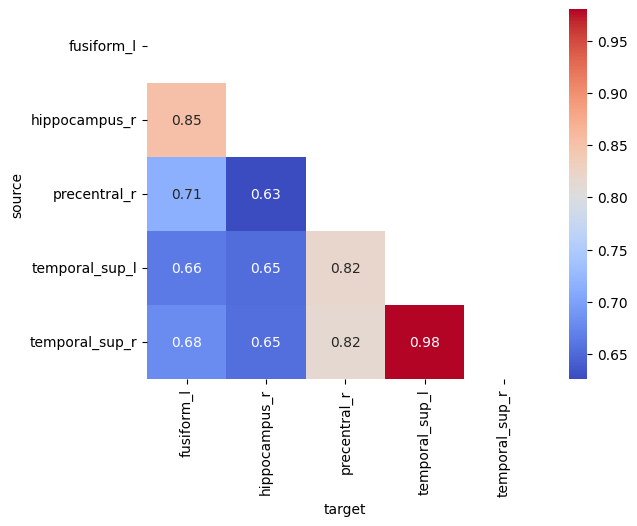

In [10]:
mask = np.zeros_like(network_df.pivot_table(values='weight', index='source', columns='target'))
mask[np.triu_indices(mask.shape[0])] = True
sns.heatmap(network_df.pivot_table(values='weight', index='source', columns='target'), mask=mask, annot=True, cmap='coolwarm')
plt.show()

In [11]:
G = nx.Graph()

source_list = network_df['source'].tolist()
target_list = network_df['target'].tolist()
weight_list = network_df['weight'].tolist()

data = {
    'source': source_list,
    'target': target_list,
    'weight': weight_list
}

for i in range(len(data['source'])):
  if data['source'][i] != data['target'][i]:  
    G.add_edge(data['source'][i], data['target'][i], weight=data['weight'][i])

# Print some information about the network
print(f"Number of nodes: {G.number_of_nodes()}")
print(f"Number of edges: {G.number_of_edges()}")


Number of nodes: 5
Number of edges: 10


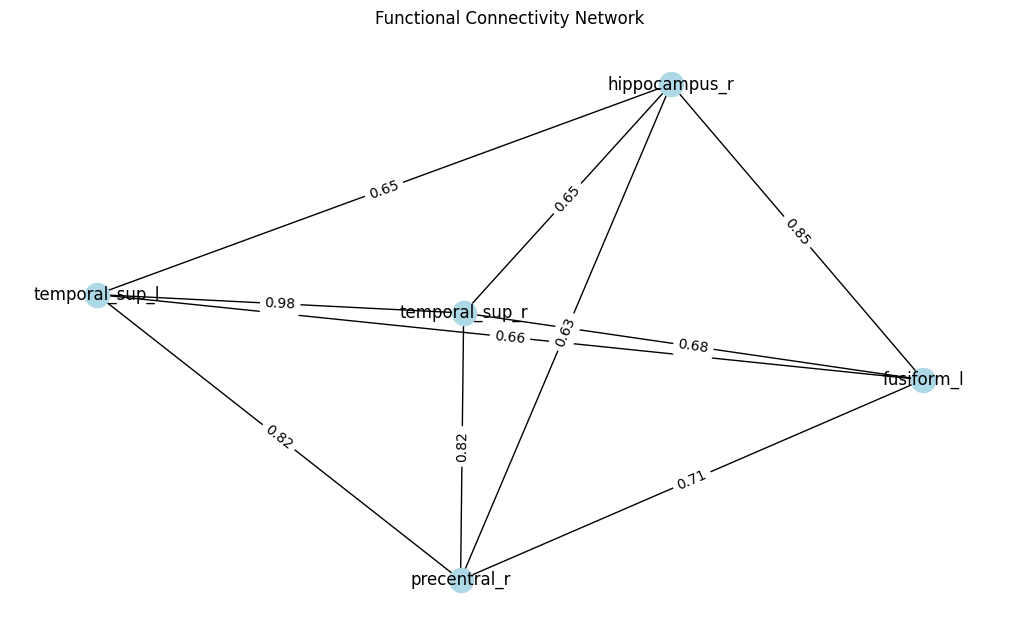

In [12]:
import matplotlib.pyplot as plt

layout_pos = nx.spring_layout(G)  

plt.figure(figsize=(10, 6))  
nx.draw(G, pos=layout_pos, with_labels=True, node_color='lightblue', edge_color='black')

edge_labels = dict((e, round(G.edges[e]['weight'], 2)) for e in G.edges)
nx.draw_networkx_edge_labels(G, pos=layout_pos, edge_labels=edge_labels)

plt.title("Functional Connectivity Network")
plt.axis('off') 
plt.show()
